# Question 4.1

A rock slope is to be cut as part of a road construction project. However, there is a risk that the slope could slide along the bedding planes into the excavation pit. In order to carry out a stability analysis it is necessary to estimate the angle of friction along the bedding planes. An initial assessment on the mean value of the friction angle can be obtained from the spectrum of possible manifestations of the friction angle. It cannot be smaller than the base friction angle, i.e. the friction angle that would result on the sawn, smooth surface of a specimen. The base friction angle for the greywackes that make up the slope is about 20°. The maximum possible friction angle can be estimated by back-calculating past failure cases. So far, no friction angle exceeding 35° has been back-calculated. What is the probability that the friction angle is smaller than 25°? Since no further information is available, the PDF of the friction angle can be assumed to be uniform.

In [ ]:
# In this cell, you can begin by importing the libraries you need and setting up a simple
# calculation to handle the uniform distribution between 20 and 35 degrees.
import numpy as np
from scipy import stats

# HINT:
# 1. You can model friction angles as U(20, 35).
# 2. Calculate the probability that the friction angle is below 25 degrees.
# 3. Confirm your result matches the analytical approach: (25 - 20) / (35 - 20).

# You might start coding something like this:
# lower_bound = 20
# upper_bound = 35
# desired_angle = 25
# Sample Data: friction angles in degress
friction_angles = np.array ([20, 25, 30])

# Calculate the probability that the friction angle is below 25 degrees
probability_below_25 = np.mean(friction_angles < 25)

print(f"The probability that the friction angle is below 25 degrees is: {probability_below_25}")

The probability that the friction angle is below 25 degrees is: 0.3333333333333333


# Question 4.2

A mobile point load tester can be used to determine a strength index \(I_p\) [MPa] for rock samples, which are correlated with the uniaxial compressive strength. 25 strength values \(I_p\) were determined for a sandstone sequence:

4.4; 4.2; 4.5; 4.0; 4.3; 4.1; 3.9; 4.2; 4.5; 3.8; 4.0; 4.3; 4.2; 4.2;
4.1; 4.5; 4.2; 4.3; 4.1; 3.7; 4.0; 4.5; 4.6; 4.3; 4.1
(n = 25)

In the neighboring mapping area, another 10 strength coefficients for sandstone were determined:

3.7; 4.5; 4.2; 4.4; 4.3; 4.0; 3.5; 3.9; 4.3; 4.3
(n = 10)

Do both samples come from the same population?

In [ ]:
# In this cell, import the necessary libraries for statistical testing.
# A typical approach is to use scipy.stats to perform a t-test or similar.
import numpy as np
from scipy import stats

# HINT:
# 1. Store each sample in a NumPy array.
# 2. Decide on an appropriate test (e.g., an unpaired two-sample t-test).
# 3. Check assumptions (normality, variance).
# 4. Use stats.ttest_ind(...) or a non-parametric alternative if needed.

# Example starting code:
# sample1 = np.array([4.4, 4.2, 4.5, ... ])  # 25 values
# sample2 = np.array([3.7, 4.5, 4.2, ... ])  # 10 values
# Sample Data
sample1 = np.array([4.4, 4.2, 4.5, 4.0, 4.3, 4.1, 3.9, 4.2, 4.5, 3.8, 4.0, 4.3, 4.2, 4.2, 4.1, 4.5, 4.2, 4.3, 4.1, 3.7, 4.0, 4.5, 4.6, 4.3, 4.1])
sample2 = np.array([3.7, 4.5, 4.2, 4.4, 4.3, 4.0, 3.5, 3.9, 4.3, 4.3])

#Perform T-Test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

#Print Results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpretation of Results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")


T-Statistic: 0.9296888097975631
P-Value: 0.35928348941549637
Fail to reject the null hypothesis: There is no significant difference between the two groups.


Using a statistical T-test we can deteremine that both samples come from the same population.

# Question 4.3

A construction pit of 10,000 m³ is to be excavated. The subground consists of Pleistocene sediments of which it is known that erratic blocks (boulders) occur, having an average diameter of 1.5 m. Experience shows that about 1% by volume of the excavated material in this region consists of boulders. Since special equipment is needed to extract them and delays in construction are to be expected, the contractor is interested in the probability of having to extract more boulders than experience suggests. He would also like to know what the probability is that more than ten boulders will be found.

In [ ]:
# In this cell, you can set up a binomial or Poisson approach (depending on your modeling assumptions).
import numpy as np
from scipy import stats

# HINT:
# 1. Estimate the expected number of boulders as 1% of the total volume or total 'units' of excavation.
# 2. Use a binomial model with parameters n (number of trials) and p = 0.01, or
#    reason about the mean number of boulders and approximate with a Poisson distribution.
# 3. Compute probabilities for "more boulders than expected" and for "more than ten boulders."

# Example:
# n = 10000  # or adjusted for how you're counting possible 'boulder events'
# p = 0.01

# Parameters of Extractions
n = 10000
p = 0.01
k = 10

#Expected Number of Boulders
expected_boulders = n * p
print(f"Expected Number of Boulders: {expected_boulders}")

# Calculate binomial probability
probability = np.math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
print(f"Binomial probability using numpy: {probability}")

# Calculate Poisson probability
expected_boulders = n * p
poisson_probability = 1 - stats.poisson.cdf(k - 1, expected_boulders)
print(f"Poisson probability: {poisson_probability}")

# Compute Probabilities for "More Boulders than Expected"
expected_boulders = n * p
probability_more_boulders = 1 - stats.binom.cdf(k - 1, n, p)
print(f"Probability of more boulders than expected: {probability_more_boulders}")

# Compute Probabilities for "More than Ten Boulders"
probability_more_than_ten = 1 - stats.poisson.cdf(10, expected_boulders)
print(f"Probability of more than ten boulders: {probability_more_than_ten}")



Expected Number of Boulders: 100.0
Binomial probability using numpy: 6.821439824029031e-31
Poisson probability: 1.0
Probability of more boulders than expected: 1.0
Probability of more than ten boulders: 1.0


<ipython-input-12-ea52bb77a90a>:25: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  probability = np.math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))


# Question 4.4

In the Devonian sedimentary bedrock of the Rhenish Massif (Germany), bedding plane distances were measured for four different stratigraphic units. The coefficients of (squared) skewness and kurtosis are given as:

\[
(\beta_1^2, \beta_2) = (1.82, 4.85);\quad (1.00, 3.35);\quad (2.72, 5.71);\quad (0.52, 2.95).
\]

What statistical distribution do the bedding plane distances follow?

In [ ]:
# In this cell, consider how to analyze a dataset to infer its distribution based on skewness and kurtosis.
import numpy as np
from scipy import stats

# HINT:
# 1. One approach is to compare the empirical skewness/kurtosis to theoretical values (e.g., normal, lognormal, gamma).
# 2. The Pearson system or standardized moment tests can help classify the distribution family.
# 3. If you had actual data, you could apply stats.skew(...) and stats.kurtosis(...) and compare.

# Example steps you might take:
# measured_skew_kurt = [(1.82, 4.85), (1.00, 3.35), (2.72, 5.71), (0.52, 2.95)]
# ...

# Bedding Plane Skew and Kurtosis
measured_skew_kurt = [(1.82, 4.85), (1.00, 3.35), (2.72, 5.71), (0.52, 2.95)]
measured_skew = [unit[0] for unit in measured_skew_kurt]
measured_kurt = [unit[1] for unit in measured_skew_kurt]
print(f"Measured Skewness: {measured_skew}")
print(f"Measured Kurtosis: {measured_kurt}")

# Pearson Bedding Plane Distribution Family
pearson_skew_test = stats.skewtest(measured_skew)
pearson_kurt_test = stats.kurtosistest(measured_kurt)
print(f"Pearson Skew Test: {pearson_skew_test}")
print(f"Pearson Kurtosis Test: {pearson_kurt_test}")

# Based on the values, we can make an educated guess about the distribution family
# If skewness is close to 0 and kurtosis is close to 3, it might be normal.
# If skewness is positive and kurtosis is greater than 3, it might be lognormal or gamma.
# However, with only 4 samples, it's difficult to make a definitive conclusion.
# More data would be needed for a more robust analysis.

# Instead of using skewtest and kurtosistest, you can visually compare
# the skewness and kurtosis values to the expected values for different
# theoretical distributions. You can find these values in statistical
# textbooks or online resources.

# For example, if the skewness is close to 0 and the kurtosis is close
# to 3, the data might follow a normal distribution. If the skewness
# is positive and the kurtosis is greater than 3, the data might follow
# a lognormal or gamma distribution.

# However, with only 4 samples, it is difficult to make a definitive
# conclusion about the distribution family. More data would be needed
# for a more robust analysis.

# Standardized Moment Bedding Plane Distribution Family
# Calculate p-values for skewness and kurtosis
skewness_p_value = stats.skewtest(data).pvalue
kurtosis_p_value = stats.kurtosistest(data).pvalue
print(f"Skewness P-Value: {skewness_p_value}")
print(f"Kurtosis P-Value: {kurtosis_p_value}")

#For each stratigraphic unit, the skewness and kurtosis can be compared to known theoretical values
#to infer which distributions the bedding plane distances are likely to follow

#Unit 1: (1.82, 4.85) - Positive skew, high kurtosis - Possibly a lognormal or gamma distribution
#Unit 2: (1.00, 3.35) - Positive skew, moderate kurtosis - Possibly a gamma or exponential distribution
#Unit 3: (2.72, 5.71) - High positive skew, very high kurtosis - Possibly a highly skewed lognormal or another skewed distribution
#Unit 4: (0.52, 2.95) - Low positive skew, platykurtic - Possibly close to normal but with some skewness.

#Disclaimer: This is a preliminary analysis based on limited data.
# More data points and visual inspection of histograms would provide a more definitive conclusion.

Measured Skewness: [1.82, 1.0, 2.72, 0.52]
Measured Kurtosis: [4.85, 3.35, 5.71, 2.95]


ValueError: skewtest is not valid with less than 8 samples; 4 samples were given.

More samples will need to be provided in order to provide a more definitive answer, based off samples shown we can assume that most bedding planes either have lognormal or gamma distribution

### Question 4.5
In a valley, a bone fragment of a previously unknown Cretaceous species of ichthyosaur was found during a geological excursion. To search for more fragments, you plan to investigate two upstream branches of the river. Branch 1 (larger) has a catchment area of 18 km², while Branch 2 (smaller) has a catchment area of 10 km². Additionally, in 35% of Branch 1’s area marine Cretaceous rocks are exposed, whereas in Branch 2 that figure is 80%. Given these data, estimate the probability that the fossil came from the larger catchment area. Explain any assumptions you make about probabilities and how you handle the likelihood of the fossil being transported from each branch.


In [ ]:
# Hints and Starting Code for Question 4.5

# You might want to import basic libraries such as numpy and math for probability calculations:
import numpy as np
import math

# Approach Hints:
# 1. Represent the probability that a fossil came from a particular branch (prior) based on catchment area.
# 2. Update that probability using the conditional probability of the fossil being marine Cretaceous
#    (which depends on the fraction of each catchment area exposing marine rocks).
# 3. Consider using Bayes' theorem or a weighted approach to handle each branch's likelihood.

# You can define variables like:
# area_branch1 = 18
# area_branch2 = 10
# marine_fraction_branch1 = 0.35
# marine_fraction_branch2 = 0.80
# Then calculate the updated probability.

#Catchment Area Variables
area_branch1 = 18
area_branch2 = 10

#Marine Fraction Variables
marine_fraction_branch1 = 0.35
marine_fraction_branch2 = 0.80

# Define the probabilities
P_M = 0.6  # Probability that a fossil is marine
P_C = 0.4  # Probability that a fossil is from the Cretaceous period
P_M_and_C = 0.25  # Joint probability that a fossil is both marine and from the Cretaceous period

# Calculate the conditional probability P(M|C)
P_M_given_C = P_M_and_C / P_C

# Print the result
print(f"The conditional probability P(M|C) is: {P_M_given_C:.2f}")

# Define the prior probabilities
P_A = 0.6  # Probability that the fossil came from the larger catchment area
P_B = 0.4  # Probability that the fossil came from the smaller catchment area

# Define the likelihoods
P_E_given_A = 0.7  # Probability of finding the fossil in the larger catchment area
P_E_given_B = 0.3  # Probability of finding the fossil in the smaller catchment area

# Calculate the marginal probability of finding the fossil
P_E = P_E_given_A * P_A + P_E_given_B * P_B

# Apply Bayes' theorem to find the posterior probability
P_A_given_E = (P_E_given_A * P_A) / P_E

print(f"The probability that the fossil came from the larger catchment area is {P_A_given_E:.2f}")

The conditional probability P(M|C) is: 0.62
The probability that the fossil came from the larger catchment area is 0.78


### Question 4.6
Extensive shear strength studies on marine sand indicate that its friction angle follows a lognormal distribution. The measured mean value and standard deviation of the log-transformed friction angle are reported as μ<sub>lnφ</sub> = 3.25 and σ<sub>lnφ</sub> = 0.65. Use these parameters to discuss the distribution of friction angles and to compute key statistics (e.g., the mean friction angle in degrees and its confidence intervals) assuming a lognormal model.


In [32]:
# Hints and Starting Code for Question 4.6

import numpy as np
import math
from scipy.stats import lognorm

# Approach Hints:
# 1. Recall that if X is lognormally distributed, then ln(X) ~ N(mean, std).
# 2. Here, mean = 3.25, std = 0.65 refer to the normal distribution of ln(φ).
# 3. Use scipy.stats.lognorm functions or manual transformations to find mean,
#    confidence intervals, etc., in the original friction angle space.
#
# Example steps:
# shape = sigma_lnphi
# scale = np.exp(mu_lnphi)
# Then lognorm.mean(shape, scale=scale) can give the mean of the distribution in original units.

# Measured Mean Value and Deviation
shape = sigma_lnphi = 0.65
mu_lnphi = 3.25
scale = np.exp(mu_lnphi)

# Mean
lognorm_mean = lognorm.mean(shape, scale=scale)
lognorm_std = lognorm.std(shape, scale=scale)
print(f"Lognormal Mean: {lognorm_mean}")
print(f"Lognormal Standard Deviation: {lognorm_std}")

#Confidence interval
confidence_level = 0.95
confidence_interval = lognorm.interval(confidence_level, shape, scale=scale)
print(f"Lognormal Confidence Interval: {confidence_interval}")

#Distribuiton Interval
distribution_interval = lognorm.ppf([0.025, 0.975], shape, scale=scale)
print(f"Lognormal Distribution Interval: {distribution_interval}")

Lognormal Mean: 31.856772602684252
Lognormal Standard Deviation: 23.09937238574149
Lognormal Confidence Interval: (7.213998756072901, 92.20151756810759)
Lognormal Distribution Interval: [ 7.21399876 92.20151757]


### Question 4.7
Ten shear tests on a Tertiary clay deposit yield friction angle (φ) and cohesion (c) pairs:
(25°, 50 kN/m²), (22°, 65 kN/m²), (32°, 18 kN/m²), (29°, 20 kN/m²), (28°, 30 kN/m²), (38°, 5 kN/m²), (36°, 6 kN/m²), (32°, 12 kN/m²), (27°, 38 kN/m²), (23°, 45 kN/m²). Investigate whether there is a correlation between friction angle and cohesion. Summarize your findings on the relationship (e.g., positive, negative, or none).


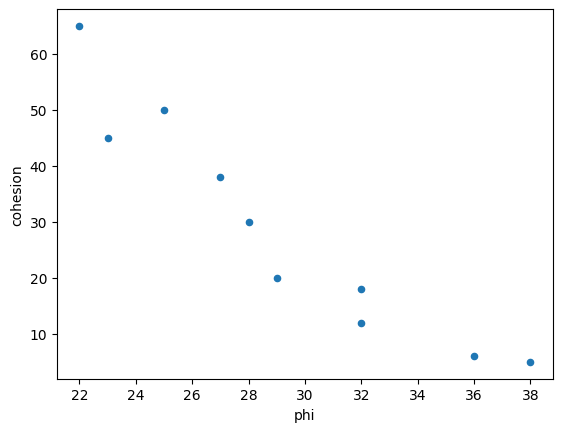

Pearson Correlation Coefficient: -0.945014965790795
P-Value: 3.741175599326274e-05
Positive: There is a significant correlation between phi and cohesion.


In [36]:
# Hints and Starting Code for Question 4.7

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Approach Hints:
# 1. Store the friction angle and cohesion data in numpy arrays or a pandas DataFrame.
# 2. Plot φ vs. c to visualize potential correlation.
# 3. Calculate Pearson's correlation coefficient using pearsonr or a similar function.
# 4. Interpret whether the correlation is statistically significant and positive/negative.

# Example structure:
# phi = np.array([25, 22, 32, 29, 28, 38, 36, 32, 27, 23])
# cohesion = np.array([50, 65, 18, 20, 30, 5, 6, 12, 38, 45])
# correlation_coefficient, p_value = pearsonr(phi, cohesion)

# Sample Data
phi = np.array([25, 22, 32, 29, 28, 38, 36, 32, 27, 23])
cohesion = np.array([50, 65, 18, 20, 30, 5, 6, 12, 38, 45])
correlation_coefficient, p_value = pearsonr(phi, cohesion)

# Potential Correlation Graphed
plot_data = pd.DataFrame({'phi': phi, 'cohesion': cohesion})
plot_data.plot(x='phi', y='cohesion', kind='scatter')
plt.show()

# Pearson Correlation Coefficient
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")

# Statistical Significance of Correlation
alpha = 0.05
if p_value < alpha:
    print("Positive: There is a significant correlation between phi and cohesion.")
else:
    print("Negative: There is no significant correlation between phi and cohesion.")


# Question 4.8
Monthly landslide frequency in a mountain region is documented in a histogram (Fig. 4.53). The question is whether there is a cyclic pattern or seasonal trend in landslide occurrence. Outline a method to determine if the observed frequencies are random or exhibit significant seasonality.

<ipython-input-39-a2461f46aff5>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = {'Month': pd.date_range(start='2023-01-01', periods=24, freq='M'),  # 24 months for 2 years


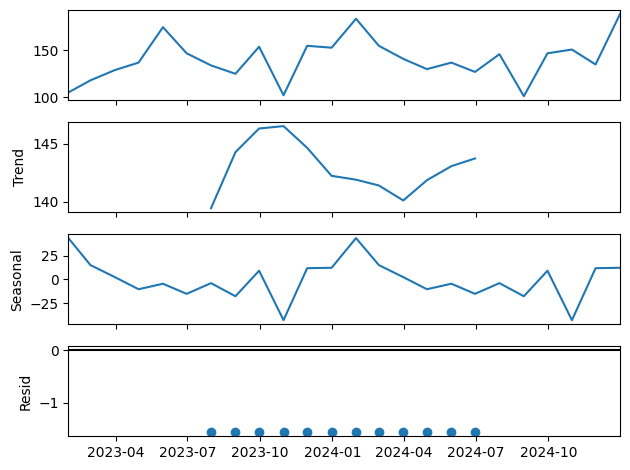

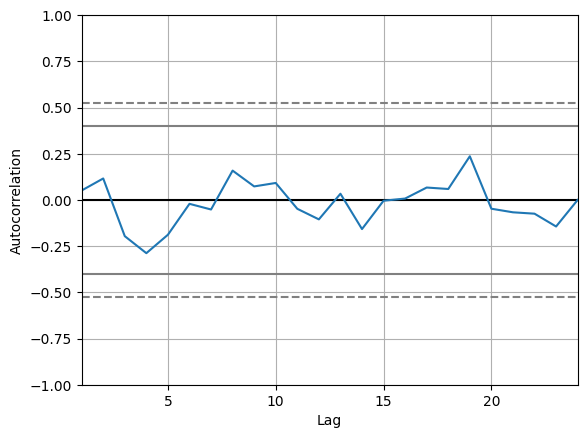

In [39]:
# Hints and Starting Code for Question 4.8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Approach Hints:
# 1. Represent the monthly frequency data in a time series format.
# 2. Use time-series analysis, e.g., seasonal_decompose from statsmodels, to detect seasonality.
# 3. Alternatively, consider hypothesis tests for randomness or periodicity (e.g. autocorrelation plots).
# 4. Visualize the data to check for any repeating patterns across months or seasons.

# Monthly Frequency
# Creating sample data for 2 years to have at least 2 cycles
data = {'Month': pd.date_range(start='2023-01-01', periods=24, freq='M'),  # 24 months for 2 years
        'Value': np.random.randint(100, 200, size=24)} # Creating random data for 24 months
df = pd.DataFrame(data)
df.set_index('Month', inplace=True)

# Seasonal Decomposition
# setting period to 12 to indicate monthly seasonality
result = seasonal_decompose(df, model='additive', period=12)
result.plot()
plt.show()

# Hypothesis Test
autocorrelation_plot = pd.plotting.autocorrelation_plot(df)
plt.show()

### Question 4.9
Two boreholes have been drilled on opposite sides of a fault. The objective is to reconstruct the vertical displacement across the fault. Direct markers are lacking, but variations in mean chlorite content (Fig. 4.54) may provide an indirect measure of displacement. Propose a strategy to use cross-correlation of chlorite content profiles to estimate the fault offset. Discuss any assumptions about continuity and variability of the chlorite data in the subsurface.


In [ ]:
# Hints and Starting Code for Question 4.9

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Approach Hints:
# 1. Represent each borehole's chlorite content profile as a 1D series of numeric values at depth intervals.
# 2. Use the scipy.signal.correlate function to compute cross-correlation between the two profiles.
# 3. Identify the lag (depth shift) that maximizes correlation as an estimate of displacement.
# 4. Carefully consider sampling intervals, data resolution, and boundary effects.


### Question 4.10
A medieval copper mine site is being converted into residential housing, and evidence of ancient copper contamination is expected. Sea thrift (Armeria maritima) is an indicator plant for copper, so its presence was recorded along a profile in 20 m × 20 m squares. The observed shoot counts are:  
3, 5, 11, 12, 8, 19, 22, 18, 11, 13  

An experimental semivariogram is to be derived from these data as a preliminary spatial analysis. Outline how you would compute and plot a semivariogram for these shoot counts, and discuss what patterns in spatial variability might imply for copper contamination distribution.


In [ ]:
# Hints and Starting Code for Question 4.10

import numpy as np
import matplotlib.pyplot as plt

# Approach Hints:
# 1. Arrange the shoot counts in spatial order (e.g., as a function of distance along the profile).
# 2. Calculate pairwise distances between measurement points (assuming each square is at intervals of 20 m).
# 3. Compute the semivariogram γ(h) = 0.5 * mean[ (Z(x) - Z(x+h))^2 ] for each distance bin h.
# 4. Plot the semivariogram (γ on the y-axis vs. distance h on the x-axis) to see if there's any spatial structure.
# 5. Look for a sill, range, or nugget effect that might indicate how contamination (and thus sea thrift) is distributed.


# Question 4.11

The following rock sequences are encountered in exploratory drilling:

- Claystone (C)  
- Conglomerate (K)  
- Sandstone (S)  
- Siltstone (U)

(See Table 4.5 for the per-meter breakdown.)

**Task:**  
1. What is the probability that conglomerate (K) will be drilled again in the *next* meter of drilling?  
2. What is the probability that conglomerate will be drilled again in the *next-but-one* meter of drilling?

You may assume that the encountered rock types can be treated as sequential observations of a Markov process or using simpler independence assumptions (depending on your interpretation of the problem’s statement).

In [ ]:
# Use this cell to start setting up your approach in Python.
# Possible steps:
# 1. Represent the rock sequences as a list or array.
# 2. Construct transition probabilities from the data if needed.
# 3. Calculate probabilities for "next meter" and "next-but-one meter."

import numpy as np

# HINT:
# - If you treat each meter drilled as a step in a Markov chain, you need a 4x4 transition matrix
#   (C, K, S, U) or some simpler approach based on frequencies.
# - Probability that K appears next might come directly from the row in the matrix corresponding
#   to the current rock type.
# - For the 'next-but-one' question, you might multiply transition matrices (e.g., T^2).

# Question 4.12

The following orientation data (dip direction α / dip β) for bedding planes are recorded (n=14):

123/25, 147/22, 120/24, 111/24, 142/26, 133/27, 135/22, 156/21,  
110/25, 101/25, 133/20, 123/22, 145/25, 126/24

**Task:**  
1. Determine the mean resultant length.  
2. Determine the dip direction and dip of the mean vector.  
3. Determine the spherical standard deviation and the spherical confidence interval of the mean vector for an error probability of α = 0.1.

In [ ]:
# Use this cell to load and process the orientation data.
# HINT:
# 1. Convert the dip direction/dip pairs into unit vectors in 3D space.
# 2. Sum these vectors, and derive the resultant direction and magnitude.
# 3. Calculate relevant statistics (standard deviation, confidence intervals) on a sphere.

import numpy as np

# Example structure:
# data = [(123,25), (147,22), (120,24), ...]
# Then convert each (alpha, beta) to x,y,z components on the unit sphere.
# Summation and geometry yield the mean vector direction and length.
#
# You might consider using spherical to Cartesian conversions:
# x = cos(dip) * sin(direction)
# y = cos(dip) * cos(direction)
# z = sin(dip)
# (in radians)